***We take a look at our data first.***

In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 5.0MB/s 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import eli5
import plotly.offline as py
import plotly.graph_objs as go
from eli5.sklearn import PermutationImportance
from collections import Counter
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

In [ ]:
df=pd.read_csv('../fifa19_data.csv')

In [ ]:
# Maximize the number of output rows into 500
pd.set_option('display.max_rows', 500)

In [ ]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Flag,https://cdn.sofifa.org/flags/52.png,https://cdn.sofifa.org/flags/38.png,https://cdn.sofifa.org/flags/54.png,https://cdn.sofifa.org/flags/45.png,https://cdn.sofifa.org/flags/7.png
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City


In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


***Data Cleaning***

In [ ]:
# Removing irrelevant data such as photos, flags, and club logos
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS                           2085
LW                           2085
LF                           2085
CF            

In [ ]:
missing_height = df[df['Height'].isnull()].index.tolist()
missing_weight = df[df['Weight'].isnull()].index.tolist()
if missing_height == missing_weight:
    print('They are same')
else:
    print('They are different')

They are same


In [ ]:
df.drop(df.index[missing_height],inplace =True)

In [ ]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                       0
Position                       12
Jersey Number                  12
Joined                       1505
Loaned From                 16895
Contract Valid Until          241
Height                          0
Weight                          0
LS                           2037
ST                           2037
RS                           2037
LW                           2037
LF                           2037
CF            

In [ ]:
df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

***Data Analysis***

In [ ]:
#Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))
print('--'*40)
print("\nEuropean Countries have most players")

Total number of countries : 164
England      1657
Germany      1195
Spain        1071
Argentina     936
France        911
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------

European Countries have most players


In [ ]:
#Total number of clubs present and top 5 clubs with highest number of players
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

Total number of clubs : 651
Newcastle United           33
Tottenham Hotspur          33
Wolverhampton Wanderers    33
Chelsea                    33
Manchester City            33
Name: Club, dtype: int64


In [ ]:
#Player with maximum Potential and Overall Performance
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [ ]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

BEST IN DIFFERENT ASPECTS :
_________________________


Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Bes

In [ ]:
#Cleaning some of the values so that we can interpret them 
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [ ]:
df.head().T

,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City
Value,1.105e+08,7.7e+07,1.185e+08,7.2e+07,1.02e+08
Wage,565000,405000,290000,260000,355000
Special,2202,2228,2143,1471,2281


In [ ]:
#Top earners
print('Most valued player : '+str(df.loc[df['Value'].idxmax()][1]))
print('Highest earner : '+str(df.loc[df['Wage'].idxmax()][1]))
print("--"*40)
print("\nTop Earners")

Most valued player : Neymar Jr
Highest earner : L. Messi
--------------------------------------------------------------------------------

Top Earners


***Visualizations***

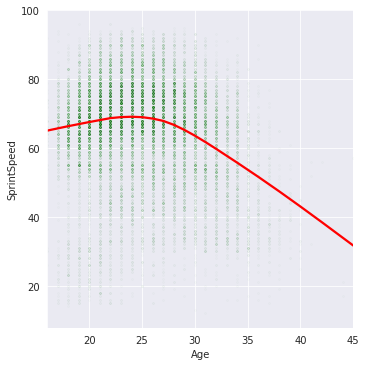

In [ ]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

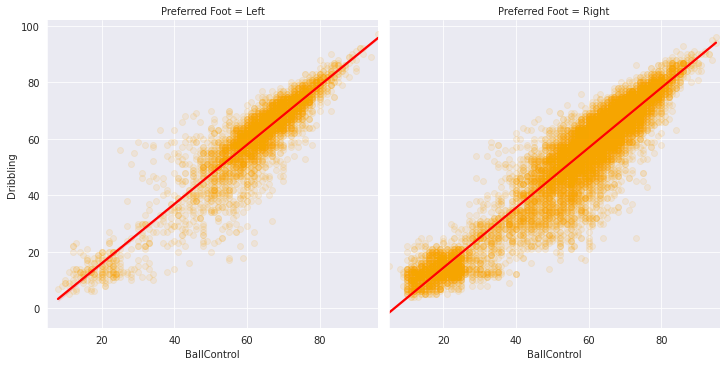

In [ ]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

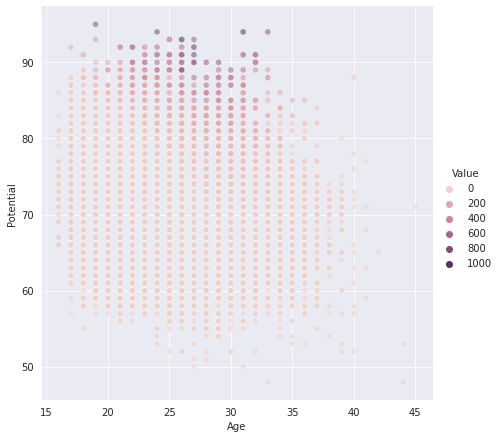

In [ ]:
value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data=df);

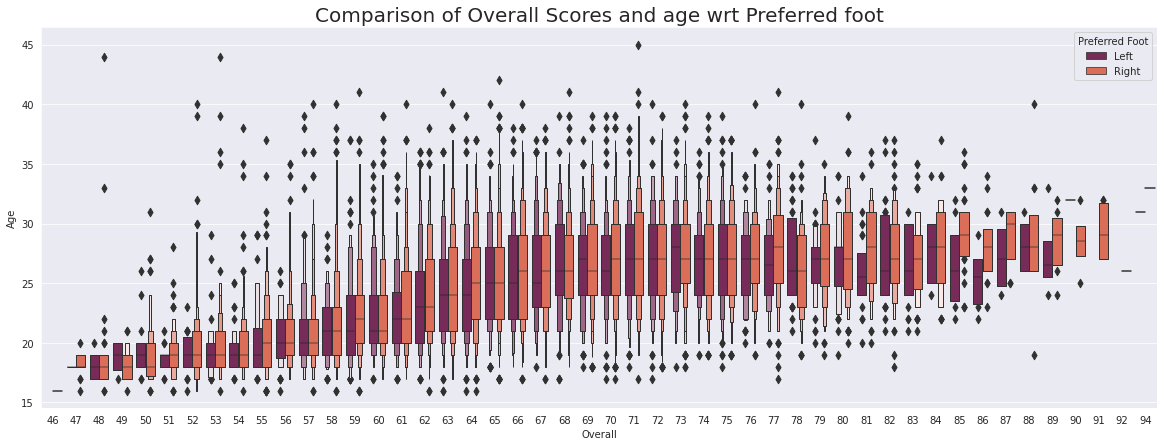

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Overall'], df['Age'], hue = df['Preferred Foot'], palette = 'rocket')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

***Further Analysis***

1.   Dealing with unnecessary features and missing values
2.   Converting categorical features to appropriate numerical features
3.   Further Visualizations





**No. 1**

In [ ]:
#Reread the csv file
df=pd.read_csv('../fifa19_data.csv')

In [ ]:
print('Number of Categorical Columns: ', len(df.select_dtypes(include=object).columns))
print('Number of Numerical Columns: ', len(df.select_dtypes(exclude=object).columns))

Number of Categorical Columns:  45
Number of Numerical Columns:  44


In [ ]:
#Removing unsignificant columns.
df.drop(columns=['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Special', 'Real Face', 'Release Clause',
                   'Joined', 'Contract Valid Until'], inplace=True)

In [ ]:
#Check for missing values in columns where missing values is more than half of the total number of values.
df.isnull().sum()[df.isnull().sum() >= 9000]

Loaned From    16943
dtype: int64

In [ ]:
#Removing columns based on the above condition.
df.drop(columns=['Loaned From'], inplace=True)

In [ ]:
df.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Height                        48
Weight                        48
LS                          2085
ST                          2085
RS                          2085
LW                          2085
LF                          2085
CF                          2085
RF                          2085
RW                          2085
LAM                         2085
CAM                         2085
RAM                         2085
LM                          2085
LCM       

In [ ]:
#Players without a club
df['Club'].fillna(value='No Club', inplace=True)

In [ ]:
df[df['Preferred Foot'].isna()].head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
13236,J. McNulty,33,Scotland,62,62,Rochdale,€120K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,J. Barrera,29,Nicaragua,62,62,Boyacá Chicó FC,€300K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,J. Stead,35,England,62,62,Notts County,€140K,€3K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,A. Semprini,20,Italy,62,72,Brescia,€425K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,R. Bingham,24,England,62,66,Hamilton Academical FC,€400K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Removing these features of NaN values
df.drop(index=df[df['Preferred Foot'].isna()].index, inplace=True)

In [ ]:
df[df['Position'].isna()][['Name', 'Nationality', 'LS', 'ST','RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                              'LAM', 'CAM', 'RAM', 'LM', 'LCM','CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
                              'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,Name,Nationality,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
5018,R. Raldes,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6736,J. Arce,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7922,L. Gutiérrez,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9905,R. Vargas,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10628,D. Bejarano,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Features such as LS, ST, RS, etc. have no value, so it is better to remove them
df.drop(index=df[df['Position'].isna()].index, inplace=True)

In [ ]:
#Checking the number of missing values in the remaining columns.
df.isnull().sum()[df.isnull().sum() > 0]

LS     2025
ST     2025
RS     2025
LW     2025
LF     2025
CF     2025
RF     2025
RW     2025
LAM    2025
CAM    2025
RAM    2025
LM     2025
LCM    2025
CM     2025
RCM    2025
RM     2025
LWB    2025
LDM    2025
CDM    2025
RDM    2025
RWB    2025
LB     2025
LCB    2025
CB     2025
RCB    2025
RB     2025
dtype: int64

In [ ]:
len(df[df['Position'] == 'GK'])

2025

In [ ]:
df.fillna(value=0, inplace=True)

In [ ]:
df.isnull().sum().sum()

0

**No. 2**

In [ ]:
df.select_dtypes(include=object).columns

Index(['Name', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'Work Rate', 'Body Type', 'Position', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'],
      dtype='object')

In [ ]:
#Convert value and wage of each player.
def currencyConverter(val):
    if val[-1] == 'M':
        val = val[1:-1]
        val = float(val) * 1000000
        return val
        
    elif val[-1] == 'K':
        val = val[1:-1]
        val = float(val) * 1000
        return val
    
    else:
        return 0

In [ ]:
df['Value in Pounds'] = df['Value'].apply(currencyConverter)
df['Wage in Pounds'] = df['Wage'].apply(currencyConverter)

df.drop(columns=['Value', 'Wage'], inplace=True)

df.head()

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value in Pounds,Wage in Pounds
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000.0,565000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000.0,405000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000.0,290000.0
3,De Gea,27,Spain,91,93,Manchester United,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000.0,260000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000.0,355000.0


In [ ]:
df[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [ ]:
#Convert the skill rating at each position.
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    
    else:
        return val

In [ ]:
skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
                      
for col in skill_columns:
    df[col] = df[col].apply(skillConverter)

In [ ]:
df[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61
1,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64
2,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76


In [ ]:
df[['Height', 'Weight']].head()

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs


In [ ]:
def height_converter(val):
    f = val.split("'")[0]
    i = val.split("'")[1]
    h = (int(f) * 30.48) + (int(i)*2.54)
    return h

def weight_converter(val):
    w = int(val.split('lbs')[0])
    return w

In [ ]:
df['Height in Cms'] = df['Height'].apply(height_converter)
df['Weight in Pounds'] = df['Weight'].apply(weight_converter)

df.drop(columns=['Height', 'Weight'], inplace=True)
df[['Height in Cms', 'Weight in Pounds']].head()

,Height in Cms,Weight in Pounds
0,170.18,159
1,187.96,183
2,175.26,150
3,193.04,168
4,180.34,154


In [ ]:
df['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [ ]:
df['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

In [ ]:
df['Body Type'][df['Body Type'] == 'Messi'] = 'Lean'
df['Body Type'][df['Body Type'] == 'C. Ronaldo'] = 'Normal'
df['Body Type'][df['Body Type'] == 'Neymar'] = 'Lean'
df['Body Type'][df['Body Type'] == 'Courtois'] = 'Lean'
df['Body Type'][df['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
df['Body Type'][df['Body Type'] == 'Shaqiri'] = 'Stocky'
df['Body Type'][df['Body Type'] == 'Akinfenwa'] = 'Stocky'

In [ ]:
print(df['Position'].unique())
print(df['Position'].nunique())

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']
27


In [ ]:
def position_simplifier(val):
    
    if val == 'RF' or val == 'ST' or val == 'LF' or val == 'RS' or val == 'LS' or val == 'CF':
        val = 'F'
        return val
        
    elif val == 'LW' or val == 'RCM' or val == 'LCM' or val == 'LDM' or val == 'CAM' or val == 'CDM' or val == 'RM' \
         or val == 'LAM' or val == 'LM' or val == 'RDM' or val == 'RW' or val == 'CM' or val == 'RAM':
        val = 'M'
        return val

    
    elif val == 'RCB' or val == 'CB' or val == 'LCB' or val == 'LB' or val == 'RB' or val == 'RWB' or val == 'LWB':
        val = 'D'
        return val
    
    else:
        return val
        

In [ ]:
df['Position'] = df['Position'].apply(position_simplifier)
df['Position'].value_counts()

M     7589
D     5866
F     2667
GK    2025
Name: Position, dtype: int64

**No. 3**

In [ ]:
#Player age distribution
trace1 = go.Histogram(x=df['Age'], nbinsx=55, opacity=0.7)

layout = go.Layout(title='<b>Players Age Distribution<b>',
                   xaxis=dict(title='<b><i>Age</b></i>'),
                   yaxis=dict(title='<b><i>Count</b></i>'),
                  )

fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

In [ ]:
#Height and weight distributions in cms and pounds, respectively
fig = tools.make_subplots(rows=1, cols=2)

trace7a = go.Histogram(x=df['Height in Cms'], nbinsx=25, opacity=0.7, name='Height in cms')
trace7b = go.Histogram(x=df['Weight in Pounds'], nbinsx=30, opacity=0.7, name='Weight in Pounds')

fig.append_trace(trace7a, 1,1)
fig.append_trace(trace7b, 1,2)

fig['layout'].update(title='<b>Height & Weight Distribution</b>', \
                     xaxis=dict(automargin=True),
                     yaxis=dict(title='<b><i>Count</b></i>')
                    )
py.iplot(fig)

In [ ]:
#Distribution of players based on their position
trace6 = go.Pie(values=df['Position'].value_counts().values,
                labels=df['Position'].value_counts().index.values,
                hole=0.3
               )
 

layout = go.Layout(title='<b>Distribution of Players Position-Wise</b>')

fig = go.Figure(data=[trace6], layout=layout)
py.iplot(fig)

In [ ]:
trace3 = go.Pie(values=df['Preferred Foot'].value_counts().values,
                 labels=df['Preferred Foot'].value_counts().index.values,
                 hole=0.3
                )
 

layout = go.Layout(title='<b>Preferred Foot</b>')

fig = go.Figure(data=[trace3], layout=layout)
py.iplot(fig)

In [ ]:
trace4 = go.Violin(x=df['Work Rate'],
                y=df['Overall']
               )

layout = go.Layout(title='<b>Work Rate vs Overall</b>',
                   xaxis=dict(title='<b><i>Work Rate</b></i>'),
                   yaxis=dict(title='<b><i>Overall</b></i>')
                  )

fig = go.Figure(data=[trace4], layout=layout)
py.iplot(fig)

In [ ]:
df_skills = df.groupby(by='Position')['Crossing', 'Finishing', 'FKAccuracy', 
                            'StandingTackle', 'Marking', 'Interceptions'].mean().reset_index()

In [ ]:
trace5a = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'F'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Forwards'
                         )

trace5b = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'M'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Midfielders'
                         )

trace5c = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'D'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Defenders'
                         )


trace5d = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'GK'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Goal Keepers'
                         )

layout = go.Layout(polar=dict(radialaxis=dict(visible=True,
                                              range=[0, 100]
                                             )
                             
                             ),
                   showlegend=True,
                   title='<b>Attributes by Position</b>'
                  )

fig = go.Figure(data=[trace5a, trace5b, trace5c, trace5d], layout=layout)
py.iplot(fig)

In [ ]:
df_nations = df.groupby(by='Nationality').size().reset_index()
df_nations.columns = ['Nation', 'Count']

In [ ]:
df_nations[(df_nations['Nation'] == 'England') | (df_nations['Nation'] == 'Wales') 
           | (df_nations['Nation'] == 'Scotland') | (df_nations['Nation'] == 'Northern Ireland') ]

,Nation,Count
46,England,1657
114,Northern Ireland,79
131,Scotland,283
161,Wales,129


In [ ]:
df_temp = pd.DataFrame(data= [['United Kingdom', 2148]], columns=['Nation', 'Count'])
df_nations = df_nations.append(df_temp, ignore_index=True)
df_nations.tail()

,Nation,Count
160,Venezuela,66
161,Wales,129
162,Zambia,9
163,Zimbabwe,13
164,United Kingdom,2148


In [ ]:
trace2 = dict(type='choropleth',
              locations=df_nations['Nation'],
              z=df_nations['Count'],
              locationmode='country names',
              colorscale='Portland'
             )

layout = go.Layout(title='<b>Number of Players in each Country</b>',
                   geo=dict(showocean=True,
                            oceancolor='#AEDFDF',
                            projection=dict(type='natural earth'),
                        )
                  )

fig = go.Figure(data=[trace2], layout=layout)
py.iplot(fig)

**Classification Based on Position Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score

In [ ]:
#Transforming categorical features into numeric values.
#Goal Keeper = 0
#Defender = 1
#Midfielder = 2
#Forward = 3
def pos_numeric(val):
    if val == 'GK':
        return 0
    elif val == 'D':
        return 1
    elif val == 'M':
        return 2
    else:
        return 3
    
df['Position'] = df['Position'].apply(pos_numeric)

In [ ]:
df_pos = df.copy()

#Removing the unnecessary columns
df_pos.drop(columns=['Name', 'Nationality', 'Club'], inplace=True)

In [ ]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
df_pos.corr().abs()['Position'].sort_values(ascending=False)

Position                    1.000000
Finishing                   0.824777
LS                          0.764850
ST                          0.764850
RS                          0.764850
Positioning                 0.760926
RF                          0.750532
CF                          0.750532
LF                          0.750532
Penalties                   0.743087
Volleys                     0.742479
RW                          0.729755
LW                          0.729755
CAM                         0.727863
RAM                         0.727863
LAM                         0.727863
LongShots                   0.716903
LM                          0.701364
RM                          0.701364
Dribbling                   0.696398
ShotPower                   0.687332
BallControl                 0.669807
GKDiving                    0.637548
LCM                         0.637297
CM                          0.637297
RCM                         0.637297
GKReflexes                  0.636032
G

In [ ]:
df_pos['Frw'] = (df_pos['RF'] + df_pos['ST'] + df_pos['LF'] + df_pos['RS'] + df_pos['LS'] + df_pos['CF']) / 6

df_pos['Mid'] = (df_pos['LW'] + df_pos['RCM'] + df_pos['LCM'] + df_pos['LDM'] + df_pos['CAM'] + df_pos['CDM'] + \
                df_pos['RM'] + df_pos['LAM'] + df_pos['LM'] + df_pos['RDM'] + df_pos['RW'] + df_pos['CM'] + df_pos['RAM'])\
                /13

df_pos['Def'] = (df_pos['RCB'] + df_pos['CB'] + df_pos['LCB'] + df_pos['LB'] + df_pos['RB'] + df_pos['RWB']\
                 + df_pos['LWB']) / 7

df_pos['Gk'] = (df_pos['GKDiving'] + df_pos['GKHandling'] + df_pos['GKKicking'] + df_pos['GKPositioning']\
               + df_pos['GKReflexes']) / 5

df_pos.drop(columns=['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM',
                     'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB',
                     'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
                    ], inplace=True)

In [ ]:
print('Correlation with Position: ', df_pos.corr().abs()['Position'].sort_values(ascending=False).index, '\n')
print('Categorical columns in dataset: ', df_pos.select_dtypes(include=object).columns, '\n')
print('Number of features in dataset: ', len(df_pos.columns))

Correlation with Position:  Index(['Position', 'Finishing', 'Positioning', 'Frw', 'Penalties', 'Volleys',
       'LongShots', 'Dribbling', 'ShotPower', 'BallControl', 'Mid', 'Gk',
       'Skill Moves', 'Curve', 'ShortPassing', 'Agility', 'FKAccuracy',
       'Vision', 'Acceleration', 'SprintSpeed', 'HeadingAccuracy', 'Balance',
       'Crossing', 'Stamina', 'Def', 'LongPassing', 'Composure',
       'Height in Cms', 'Weak Foot', 'Weight in Pounds', 'Aggression',
       'SlidingTackle', 'Reactions', 'Interceptions', 'StandingTackle',
       'Potential', 'Age', 'Value in Pounds', 'Jumping', 'Jersey Number',
       'Wage in Pounds', 'Overall', 'Marking', 'International Reputation',
       'Strength'],
      dtype='object') 

Categorical columns in dataset:  Index(['Preferred Foot', 'Work Rate', 'Body Type'], dtype='object') 

Number of features in dataset:  48


In [ ]:
df_pos.drop(columns=['StandingTackle', 'Potential', 'Age', 'Value in Pounds', 
                     'Jumping', 'Jersey Number', 'Wage in Pounds', 'Overall', 'Marking',
                     'International Reputation', 'Strength', 'Preferred Foot'], inplace=True)

In [ ]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       0.91      0.92      0.92      1922
           2       0.89      0.88      0.89      2544
           3       0.85      0.86      0.86       866

    accuracy                           0.90      5989
   macro avg       0.91      0.92      0.91      5989
weighted avg       0.90      0.90      0.90      5989



[[ 657    0    0    0]
 [   0 1769  151    2]
 [   0  173 2243  128]
 [   0    2  117  747]]


Accuracy Score:  0.9043245950910002


In [ ]:
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = 12, 8

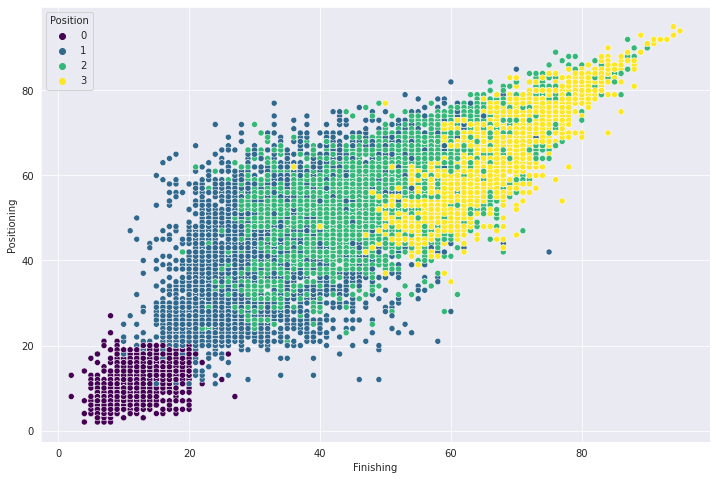

In [ ]:
sns.scatterplot(data=df_pos, x='Finishing', y='Positioning', hue='Position', palette='viridis')
plt.show()

In [ ]:
df_pos = df_pos[~((df_pos['Position'] == 1) & (df_pos['Finishing'] > 30) & (df_pos['Positioning'] < 60))]
df_pos = df_pos[~((df_pos['Position'] == 2) & (df_pos['Finishing'] > 60) & (df_pos['Positioning'] < 80))]
df_pos = df_pos[~((df_pos['Position'] == 3) & (df_pos['Finishing'] < 45))]
df_pos = df_pos[~((df_pos['Position'] == 3) & (df_pos['Finishing'] < 60) & (df_pos['Positioning'] > 70))]
df_pos = df_pos[~((df_pos['Position'] == 2) & (df_pos['Finishing'] > 65) & (df_pos['Positioning'] > 70))]

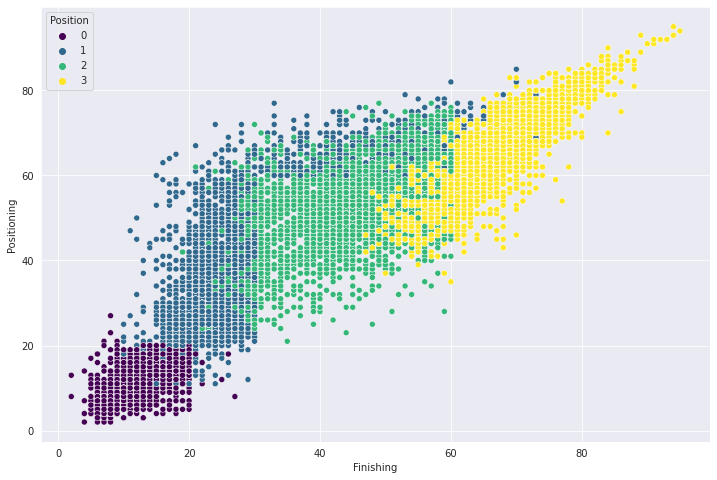

In [ ]:
sns.scatterplot(data=df_pos, x='Finishing', y='Positioning', hue='Position', palette='viridis')
plt.show()

In [ ]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       675
           1       0.92      0.91      0.91      1125
           2       0.91      0.92      0.92      1613
           3       0.95      0.95      0.95       856

    accuracy                           0.93      4269
   macro avg       0.94      0.94      0.94      4269
weighted avg       0.93      0.93      0.93      4269



[[ 675    0    0    0]
 [   0 1022  100    3]
 [   0   93 1481   39]
 [   0    1   42  813]]


Accuracy Score:  0.9348793628484423


**Linear Regression (Predicting Player Ratings)**

In [ ]:
df=pd.read_csv('../fifa19_data.csv')

In [ ]:
#Removing unnecessary values
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
#Turning real face into a binary indicator variable
def face_to_num(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
#Turning preferred foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Creating a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

#Getting a count of nationalities in the dataset, and making of list of those with over 250 Players (the major nations)
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replacing nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

#Creating a copy of the original dataframe to avoid indexing errors
df1 = df.copy()

#Applying changes to the dataset to create new column
df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

#Spliting the Work Rate column into two
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Creating a new column for first work rate
df1["WorkRate1"]= tempwork[0]   
#Creating a new column for second work rate
df1["WorkRate2"]= tempwork[1]
#Dropping original columns used
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation,WorkRate1,WorkRate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,1,MF,1,High,High


In [ ]:
#Splitting ID as a target value
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [ ]:
#Applying linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9314359827632717
RMSE : 1.8121670912617636


In [ ]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are Potential, Age & Reactions

Weight,Feature
0.3605 ± 0.0139,Potential
0.1900 ± 0.0083,Age
0.0769 ± 0.0041,Reactions
0.0697 ± 0.0038,BallControl
0.0438 ± 0.0026,GKReflexes
0.0353 ± 0.0017,GKDiving
0.0228 ± 0.0005,HeadingAccuracy
0.0222 ± 0.0020,ShortPassing
0.0181 ± 0.0009,GKHandling
0.0144 ± 0.0014,Skill Moves


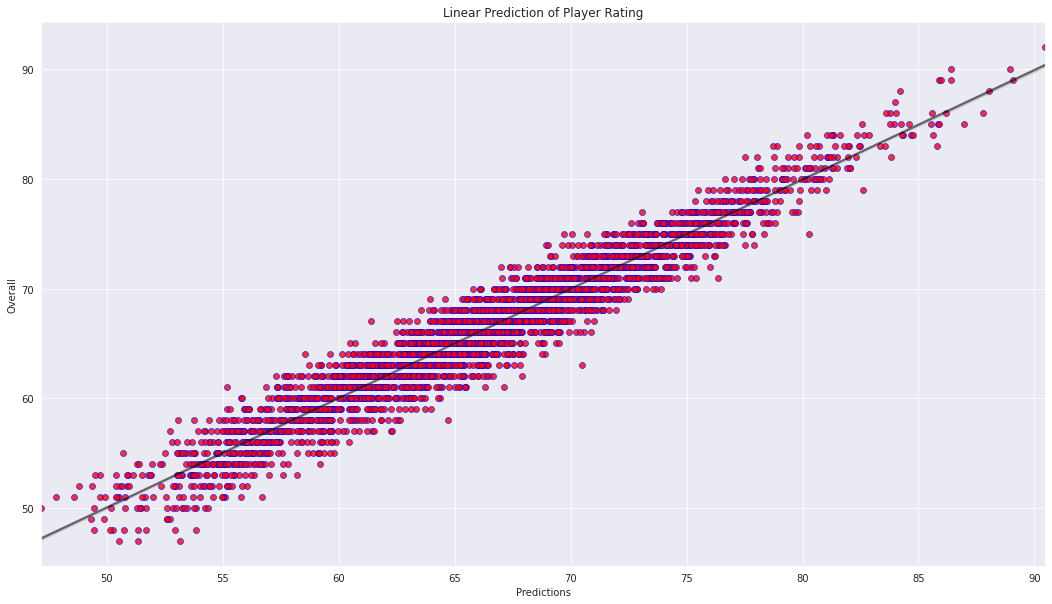

In [ ]:
#Visualizing the results
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()